# DePaul ML - Assignment 1

This notebook uses the DePaul ML environment with all required packages.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

print("All packages loaded successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(
    f"Scikit-learn version: {datasets.__version__ if hasattr(datasets, '__version__') else 'Available'}"
)
print(f"Matplotlib version: {plt.matplotlib.__version__}")

All packages loaded successfully!
NumPy version: 2.3.3
Pandas version: 2.3.2
Scikit-learn version: Available
Matplotlib version: 3.10.6


# DSC 445 — Homework 1
---
Solutions for Questions 2–5.

**Instructions:**
- Q2 and Q3 can be run directly (no extra files needed).
- Q4 requires the thresholded MNIST dataset files (NumPy .npy files).
- Q5 requires scientific_texts_train.tsv and scientific_texts_test.tsv.


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# ---- Training table used (6 rows) ----
train = pd.DataFrame(
    {
        "sepal_length": [4.8, 4.7, 6.0, 5.4, 6.0, 7.7],
        "sepal_width": [3.0, 3.2, 2.9, 3.0, 3.0, 3.8],
        "petal_length": [1.4, 1.3, 4.5, 4.5, 4.8, 6.7],
        "petal_width": [0.3, 0.2, 1.5, 1.5, 1.8, 2.2],
        "class": [
            "Setosa",
            "Setosa",
            "Versicolor",
            "Versicolor",
            "Virginica",
            "Virginica",
        ],
    }
)
test = np.array([5.0, 3.3, 1.5, 0.5]).reshape(1, -1)

# ==========================
# Q2: Distances
# ==========================
print("\n" + "=" * 50)
print("Q2: Distances to test sample")
print("=" * 50)
X = train[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
dists = np.linalg.norm(X - test, axis=1)
dist_table = train.copy()
dist_table["distance_to_test"] = dists
for i, row in dist_table.sort_values("distance_to_test").iterrows():
    print(f"{i+1}. Class: {row['class']}, Distance: {row['distance_to_test']:.4f}")

# ==========================
# Q2: KNN Predictions
# ==========================
print("\n" + "=" * 50)
print("Q2: KNN Predictions")
print("=" * 50)
knn1 = KNeighborsClassifier(n_neighbors=1).fit(X, train["class"])
knn3 = KNeighborsClassifier(n_neighbors=3).fit(X, train["class"])

for k, model in zip([1, 3], [knn1, knn3]):
    pred = model.predict(test)[0]
    probs = model.predict_proba(test)[0]
    classes = model.classes_
    print(f"\nk={k} Prediction: {pred}")
    print("Class Probabilities:")
    for cls, p in zip(classes, probs):
        print(f"  {cls}: {p:.4f}")

# ==========================
# Q3: Logistic Regression - Unregularized
# ==========================
print("\n" + "=" * 50)
print("Q3: Logistic Regression - Unregularized Theta")
print("=" * 50)
train4 = train.iloc[:4].reset_index(drop=True)
X3 = train4[["sepal_length", "sepal_width"]].values
y3 = train4["class"].map({"Setosa": 0, "Versicolor": 1}).values

clf_noreg = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
clf_noreg.fit(X3, y3)
theta_no_reg = np.concatenate(([clf_noreg.intercept_[0]], clf_noreg.coef_.ravel()))
print(theta_no_reg)


# Individual cross-entropy losses
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def ind_loss(theta, x, y):
    b, w1, w2 = theta[0], theta[1], theta[2]
    z = b + w1 * x[0] + w2 * x[1]
    p = sigmoid(z)
    eps = 1e-12
    return -(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))


ind_losses = [ind_loss(theta_no_reg, X3[i], y3[i]) for i in range(len(y3))]

print("\n" + "=" * 50)
print("Q3: Individual Cross-Entropy Losses")
print("=" * 50)
for i, loss in enumerate(ind_losses):
    print(f"Data point {i+1}: Loss = {loss:.6f}")
print(f"Average Loss: {np.mean(ind_losses):.6f}")

# ==========================
# Q3: Logistic Regression - L2 Regularized
# ==========================
print("\n" + "=" * 50)
print("Q3: L2 Regularized Theta")
print("=" * 50)
clf_l2 = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=1000)
clf_l2.fit(X3, y3)
theta_reg = np.concatenate(([clf_l2.intercept_[0]], clf_l2.coef_.ravel()))
print(theta_reg)
print(
    f"L2 Norms -> No Reg: {np.linalg.norm(theta_no_reg):.4f} | Reg: {np.linalg.norm(theta_reg):.4f}"
)


# Total objective
def total_obj(theta, X, y, C=1.0):
    lam = 1.0 / (2.0 * C)
    losses = [ind_loss(theta, X[i], y[i]) for i in range(len(y))]
    reg = lam * np.sum(theta[1:] ** 2)
    return np.mean(losses) + reg


print("\n" + "=" * 50)
print("Q3: Total Objective Function")
print("=" * 50)
print(f"Total objective (theta_reg): {total_obj(theta_reg, X3, y3, C=1.0):.6f}")
print(f"Total objective (theta_no_reg): {total_obj(theta_no_reg, X3, y3, C=1.0):.6f}")


Q2: Distances to test sample
1. Class: Setosa, Distance: 0.4243
2. Class: Setosa, Distance: 0.4796
4. Class: Versicolor, Distance: 3.2016
3. Class: Versicolor, Distance: 3.3407
5. Class: Virginica, Distance: 3.6973
6. Class: Virginica, Distance: 6.1213

Q2: KNN Predictions

k=1 Prediction: Setosa
Class Probabilities:
  Setosa: 1.0000
  Versicolor: 0.0000
  Virginica: 0.0000

k=3 Prediction: Setosa
Class Probabilities:
  Setosa: 0.6667
  Versicolor: 0.3333
  Virginica: 0.0000

Q3: Logistic Regression - Unregularized Theta
[ -9.1208652   24.38870396 -38.41824883]

Q3: Individual Cross-Entropy Losses
Data point 1: Loss = 0.000669
Data point 2: Loss = 0.000000
Data point 3: Loss = 0.000000
Data point 4: Loss = 0.000660
Average Loss: 0.000332

Q3: L2 Regularized Theta
[-3.54764247  0.74618048 -0.11533219]
L2 Norms -> No Reg: 46.4108 | Reg: 3.6271

Q3: Total Objective Function
Total objective (theta_reg): 0.816363
Total objective (theta_no_reg): 1035.385694


## Question 4 — Naïve Bayes on MNIST

**Requires:** thresholded MNIST NumPy arrays (`X_train`, `y_train`, `X_test`, `y_test`).

=== MNIST Naive Bayes ===

Train data: (10000, 784)
Train labels: (10000,)
Test data: (1000, 784)
Test labels: (1000,) 



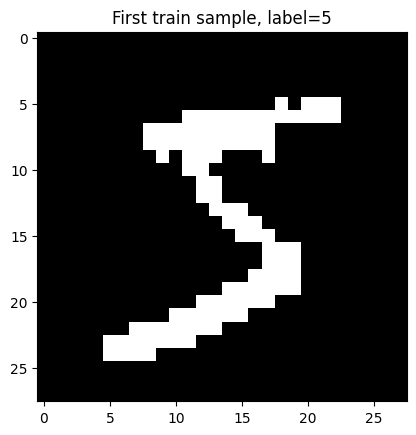

Some model info:
feature_log_prob_ shape: (10, 784)
class_log_prior_ shape: (10,)
classes: [0 1 2 3 4 5 6 7 8 9] 



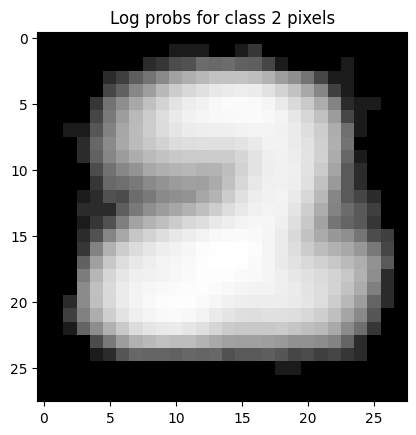

Test results:
Accuracy: 0.867
F1 score (macro): 0.8666913328830281 

Sklearn joint log prob for sample 0, class 1: -82.15459558570635
Manual calc log P(x,y=1): -82.15459558570552
Diff: 8.242295734817162e-13 



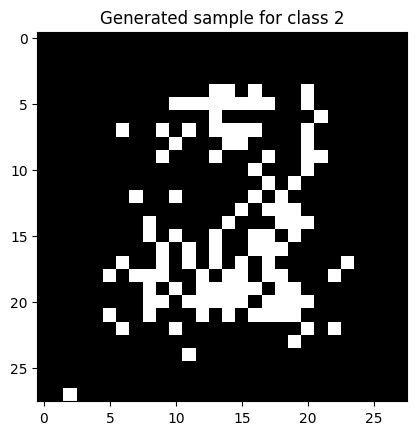

Generated sample info:
Shape: (28, 28)
Unique values: [0 1]
Proportion of 1s: 0.1441326530612245


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, f1_score

# --- Load MNIST data ---
print("=== MNIST Naive Bayes ===\n")

# Load vectorized training images (each row = 28x28 image flattened)
X_train = np.loadtxt("../../data/MNIST_train_vectorized_images.txt")
# Load training labels (digits 0-9)
y_train = np.loadtxt("../../data/MNIST_train_labels.txt", dtype=int)

# Load vectorized test images and labels
X_test = np.loadtxt("../../data/MNIST_trest_vectorized_images.txt")
y_test = np.loadtxt("../../data/MNIST_test_labels.txt", dtype=int)

# Quick check of data shapes
print("Train data:", X_train.shape)  # (num_samples, 784)
print("Train labels:", y_train.shape)
print("Test data:", X_test.shape)
print("Test labels:", y_test.shape, "\n")

# --- Visualize first training image ---
# Reshape flattened image to 28x28 for plotting
plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
plt.title(f"First train sample, label={y_train[0]}")
plt.show()

# --- Train Bernoulli Naive Bayes classifier ---
clf = BernoulliNB()
clf.fit(X_train, y_train)  # Fit model on training data

# Print some info about trained model
print("Some model info:")
print(
    "feature_log_prob_ shape:", clf.feature_log_prob_.shape
)  # log probs for pixels per class
print(
    "class_log_prior_ shape:", clf.class_log_prior_.shape
)  # log prior probs of classes
print("classes:", clf.classes_, "\n")  # class labels

# --- Look at log probabilities for class 2 pixels ---
class2_idx = np.where(clf.classes_ == 2)[0][0]
theta_class2 = clf.feature_log_prob_[class2_idx].reshape(28, 28)

plt.imshow(theta_class2, cmap="gray")
plt.title("Log probs for class 2 pixels")
plt.show()

# --- Evaluate model on test set ---
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")

print("Test results:")
print("Accuracy:", acc)
print("F1 score (macro):", f1, "\n")

# --- Check joint log probability for first test sample ---
jp = clf.predict_joint_log_proba(X_test[:1])[0, 1]  # class 1
print("Sklearn joint log prob for sample 0, class 1:", jp)

# Manual computation of joint log probability (for verification)
class1_idx = np.where(clf.classes_ == 1)[0][0]
log_theta = clf.feature_log_prob_[class1_idx]  # log P(pixel|class)
log_prior = clf.class_log_prior_[class1_idx]  # log P(class)
x0 = X_test[0]

log_like = 0
for j in range(len(x0)):
    if x0[j] == 1:
        log_like += log_theta[j]  # add log P(pixel=1|class)
    else:
        log_like += np.log(1 - np.exp(log_theta[j]))  # add log P(pixel=0|class)

manual_jp = log_like + log_prior
print("Manual calc log P(x,y=1):", manual_jp)
print("Diff:", abs(jp - manual_jp), "\n")  # Should be very close to sklearn's value

# --- Generate a new sample for class 2 ---
theta_class2_vals = np.exp(
    clf.feature_log_prob_[class2_idx]
)  # convert log probs to actual probs
sample = np.random.binomial(1, theta_class2_vals).reshape(
    28, 28
)  # generate binary image

plt.imshow(sample, cmap="gray")
plt.title("Generated sample for class 2")
plt.show()

# Info about generated image
print("Generated sample info:")
print("Shape:", sample.shape)
print("Unique values:", np.unique(sample))  # should be 0 and 1
print("Proportion of 1s:", np.mean(sample))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

# ==========================
# Q4: Text Classification with Naive Bayes
# ==========================
print("\n" + "=" * 60)
print("Text Classification with Naive Bayes")
print("=" * 60)

# Load data
train = pd.read_csv("../../data/scientific_texts_train.tsv", sep="\t")
test = pd.read_csv("../../data/scientific_texts_test.tsv", sep="\t")

print(f"Training data shape: {train.shape}, columns: {train.columns.tolist()}")
print(f"Test data shape: {test.shape}, columns: {test.columns.tolist()}")

# Assume: first column = text, second column = label
text_col, label_col = train.columns[0], train.columns[1]
print(f"\nUsing columns: text='{text_col}', label='{label_col}'")

print(f"Training label distribution:\n{train[label_col].value_counts()}")
print(f"Test label distribution:\n{test[label_col].value_counts()}")

# Sample abstracts
print("\nSample abstracts:")
for label in train[label_col].unique():
    sample_text = train[train[label_col] == label][text_col].iloc[0]
    print(f"{label}: {sample_text[:200]}...")

X_train_text, y_train = train[text_col], train[label_col]
X_test_text, y_test = test[text_col], test[label_col]


def evaluate_bow_model(min_df, max_df):
    print(f"\n--- Evaluating with min_df={min_df}, max_df={max_df} ---")

    # (a) Fit BoW model
    vec = CountVectorizer(min_df=min_df, max_df=max_df, stop_words="english")
    X_train = vec.fit_transform(X_train_text)
    X_test = vec.transform(X_test_text)
    vocab = vec.get_feature_names_out()
    vocab_size = len(vocab)
    print(f"Vocabulary size: {vocab_size}")

    # (b) Dense representation + dimensions
    X_train_dense = np.array(X_train.todense())
    X_test_dense = np.array(X_test.todense())
    print(f"Training feature matrix shape: {X_train_dense.shape}")
    print(f"Test feature matrix shape: {X_test_dense.shape}")
    print(f"Explanation: (#docs, #vocabulary words)")

    # (c) Train Naïve Bayes
    clf = MultinomialNB(alpha=1.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1_biology = f1_score(y_test, y_pred, pos_label="biology")
    print(f"Test Accuracy: {accuracy:.4f}, F1 (biology): {f1_biology:.4f}")

    # Top words (optional interpretability)
    feature_names = np.array(vocab)
    print("\nTop 10 words per class:")
    for i, class_name in enumerate(clf.classes_):
        top_indices = np.argsort(clf.feature_log_prob_[i])[::-1][:10]
        top_words = feature_names[top_indices]
        print(f"{class_name}: {', '.join(top_words)}")

    return vocab_size, X_train_dense.shape, X_test_dense.shape, accuracy, f1_biology


# (d) Run for multiple min_df values
results = []
for min_df in [0.05, 0.02, 0.01]:
    vocab_size, train_shape, test_shape, accuracy, f1_bio = evaluate_bow_model(
        min_df, 0.8
    )
    results.append((min_df, vocab_size, train_shape, test_shape, accuracy, f1_bio))

# Final summary (concise answers for a–d)
print("\n" + "=" * 60)
print("Final Summary of Results")
print("=" * 60)
print(
    f"{'min_df':<8} {'Vocab Size':<12} {'Train Shape':<18} {'Test Shape':<18} {'Accuracy':<10} {'F1 (biology)':<12}"
)
print("-" * 80)
for min_df, vocab_size, train_shape, test_shape, accuracy, f1_bio in results:
    print(
        f"{min_df:<8} {vocab_size:<12} {str(train_shape):<18} {str(test_shape):<18} {accuracy:<10.4f} {f1_bio:<12.4f}"
    )

print("\nPattern Analysis:")
print("1. As min_df decreases (0.05 → 0.02 → 0.01):")
print("   - Vocabulary size increases because fewer rare words are filtered out.")
print("   - Feature matrices expand horizontally (#columns grows).")
print("2. Accuracy impact:")
print(
    "   - Lower min_df may include more informative rare words → potential accuracy gain."
)
print("   - But too many rare/noisy words can hurt performance.")
print("3. Conclusion: Optimal min_df balances informativeness vs noise.")


Text Classification with Naive Bayes
Training data shape: (1000, 2), columns: ['abstract', 'class']
Test data shape: (100, 2), columns: ['abstract', 'class']

Using columns: text='abstract', label='class'
Training label distribution:
class
biology      500
sociology    500
Name: count, dtype: int64
Test label distribution:
class
biology      50
sociology    50
Name: count, dtype: int64

Sample abstracts:
biology: protein-l-isoaspartate (d-aspartate) o-methyltransferases (ec 2.1.1.77) that catalyze the transfer of methyl groups from s-adenosylmethionine to abnormal l-isoaspartyl and d-aspartyl residues in a var...
sociology: this essays tries to show that jewish economic ethics as presented by meir tamari in with all your possessions is ethics for a functioning religious and political community and that it is largely irre...

--- Evaluating with min_df=0.05, max_df=0.8 ---
Vocabulary size: 115
Training feature matrix shape: (1000, 115)
Test feature matrix shape: (100, 115)
Explanation: